<a href="https://colab.research.google.com/github/mggozzi/assignment4/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [2]:
! git clone https://www.github.com/mggozzi/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 9
Receiving objects: 100% (11/11), 602.70 KiB | 2.04 MiB/s, done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [3]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./assignment4/data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
#addressing outliers-> checking for outliers in Mileage_Run and Price, because outliers in these categories seem likely

# Compute IQR and 1st,3rd quantiles for Price
pct25, pct75 = np.percentile(df.Price,[25,75])
iqr = pct75 - pct25
# Compute whiskers:
lower_whisker = pct25 - iqr*1.5
upper_whisker = pct75 + iqr*1.5

outliers = df[(df['Price'] < lower_whisker) | (df['Price'] > upper_whisker)]
#print(outliers)

#Price has a lot of outliers, will windsorize with function


# Compute IQR and 1st,3rd quantiles for Mileage_Run
pct25, pct75 = np.percentile(df.Mileage_Run,[25,75])
iqr = pct75 - pct25
# Compute whiskers:
lower_whisker2 = pct25 - iqr*1.5
upper_whisker2 = pct75 + iqr*1.5



outliers2 = df[(df['Mileage_Run'] < lower_whisker2) | (df['Mileage_Run'] > upper_whisker2)]
#print(outliers2)
#no outliers for Mileage_Run


def windsorize(x):
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

windsorize(df.Price)
## this was an attempt to remove outliers from Price and make data easier to work with / understand

<ipython-input-5-985d8fdf4a2a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-5-985d8fdf4a2a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


0       657000
1       682000
2       793000
3       414000
4       515000
        ...   
971     956000
972    1027000
973     736000
974     749000
975     691000
Name: Price, Length: 976, dtype: int64

In [6]:
#'Price' value scale is weird- taking arcsinh transformation to rescale
df['Price_scale'] = np.arcsinh(df['Price'])

#still not right- trying with log transformation instead
df['Price_log'] = np.log(df['Price'])

#data values are smaller, but will be hard to answer HW questions about price / brand cost
#leaving price column as is (outliers removed, unscaled) for now

<Axes: xlabel='Price', ylabel='Density'>

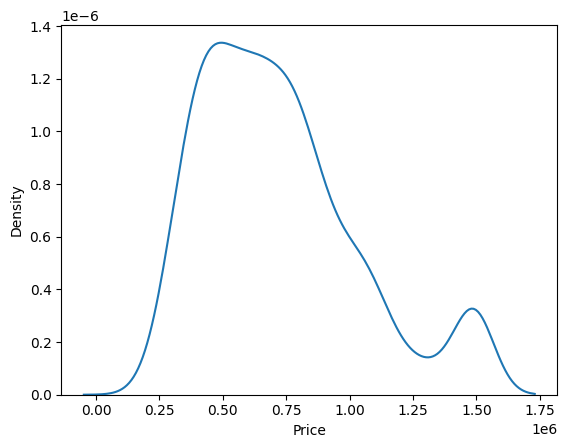

In [7]:
#summarize price and kernel density plot
df['Price'].describe()
sns.kdeplot(df['Price'])

<ipython-input-8-f0b9e1fa7c9a>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Price', hue='Make')


<Axes: xlabel='Price', ylabel='Density'>

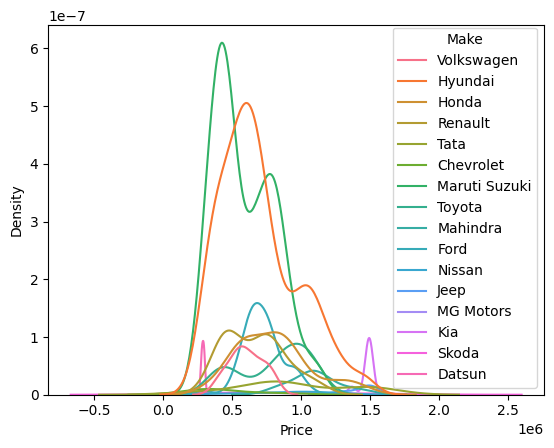

In [8]:
#price by make
df['Price'].groupby(df['Make']).describe()
sns.kdeplot(data=df, x='Price', hue='Make')


On the data table, MG Motors cars have the highest mean value.  The graph seems to be indicating that the most expensive car is Skoda (pink line).  Car prices in this dataset are not accurate to US Dollars- I'm assuming the values either are not USD or need to transformed some other way besides arcsinh or log scaling.


In [9]:
#splitting the data into testing and training
from sklearn.model_selection import train_test_split

#y = df['Price']
#X = df.drop(['Price'], axis=1)

train_set, test_set = train_test_split(df,test_size=.2,random_state=104)

Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the test set?

In [10]:
# regressing price on numeric variables
from sklearn.linear_model import LinearRegression

def pn(x):
    print(x,'\n')

y= df['Price']
vars = ['Seating_Capacity','Mileage_Run','Make_Year'] # This is a list of variables to use

X = df.loc[:,vars] # Construct data matrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(reg.score(X, y)) # R squared measure

predict = reg.predict(X_test)
from sklearn.metrics import mean_squared_error

pn(np.sqrt(mean_squared_error(y_test, predict)))

0.35270063917606376 

243861.063606679 



Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set?

In [11]:
y = df['Price']
categorical_vars = ['Make','Color','Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# got info for multiple variable one hot encoding from https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
df2 = pd.get_dummies(df, columns = categorical_vars)
drop_cols = ['Price', 'Make_Year', 'Seating_Capacity', 'Mileage_Run', 'Price_scale', 'Price_log']

new_df2 = df2.drop(columns=drop_cols)
#new_df2.head()

X_2 = new_df2 # Construct data matrix

X_train, X_test, y_train, y_test = train_test_split(X_2,y,test_size=.2,random_state=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(reg.score(X_2, y)) # R squared measure

predict = reg.predict(X_test)
from sklearn.metrics import mean_squared_error

pn(np.sqrt(mean_squared_error(y_test, predict)))

#this test performed better- the R squared value is closer to 1 which means it is a more accurate prediction

0.7259558192971146 

173507.54692334338 



Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [12]:
combined = pd.concat([X, X_2], axis=1)
combined.describe()

X_3 = combined # Construct data matrix

X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(reg.score(X_3, y)) # R squared measure

predict = reg.predict(X_test)
from sklearn.metrics import mean_squared_error

pn(np.sqrt(mean_squared_error(y_test, predict)))

#the joint model is the best of the 3 models.  The R squared value is approximately 0.838 (and the closest to 1), which is
#approximately 0.112 greater than the 2nd model where the R squared value was approximately 0.726

0.8380428986404173 

136123.80178261307 



Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 3?

In [13]:
#degree = 2

from sklearn.preprocessing import PolynomialFeatures

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_3) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
z_dataframe = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(z_dataframe,y,test_size=.2,random_state=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model

pn(reg.score(z_dataframe, y)) # R squared measure

predict = reg.predict(X_test)

pn(np.sqrt(mean_squared_error(y_test, predict)))

#R square is negative

#compared to the best model from the previous question, this is worse.
#The R squared value is negative, and the RMSE value is larger (indicating more/greater error)

-20188.80064758662 

98690782.17069076 



In [14]:
#degree = 3

expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(X_3) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
z_dataframe2 = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(z_dataframe2,y,test_size=.2,random_state=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model

pn(reg.score(z_dataframe2, y)) # R squared measure

predict = reg.predict(X_test)

pn(np.sqrt(mean_squared_error(y_test, predict)))

#R squared is more negative after increasing degree from 2 to 3
#RMSE got larger when the degree increased from 2 to 3


-22679.642712434255 

104601605.562617 



For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

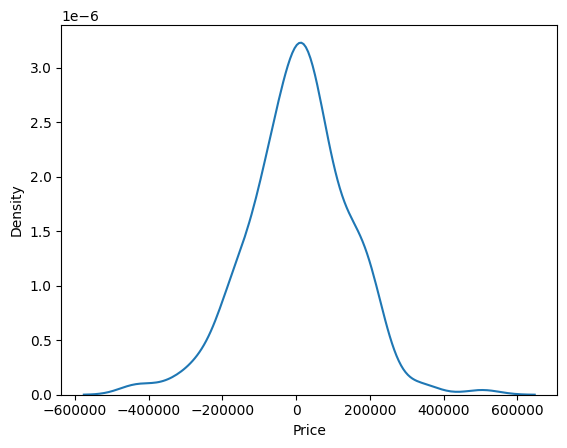

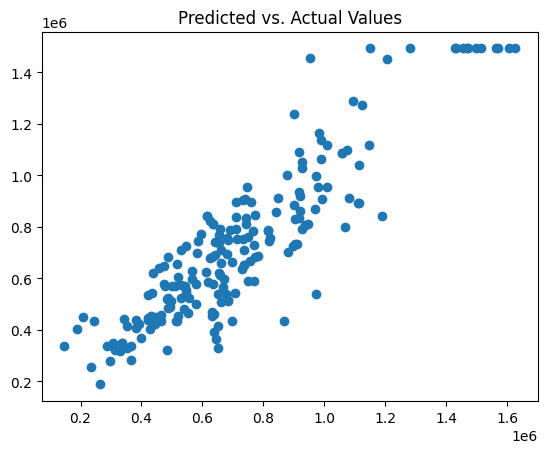

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)


#fitting
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()
#The residuals do look roughly bell shaped around zero.  The range for residuals is very wide (-600,000 to 600,000), but it is easy to interpret.

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()
#They do roughly line up on the diagonal.  It is easy to interpret this graph, and I am curious about what is going on with the points in the top right corner, where they seem to hit an 'actual'/'true' limit
# I think this is probably a result of my choice to windsorize the data earlier in my cleaning process
# this seems to have 'capped' the data --> probably would not do this again in future projects

Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  𝑅2  and RMSE on the test set of a variety of depths. What depth tree gives the best results?

Accuracy:  0.5 

0.5522412546636338 

207345.61821539328 



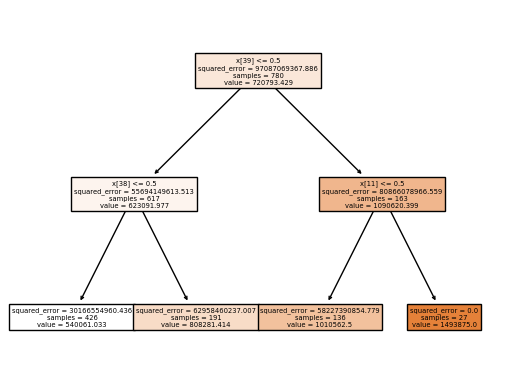

In [16]:
#depth of 2

from sklearn import tree # Import the tree classifier

#using the X_3 matrix again
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)

# Fit decision tree:
cart = tree.DecisionTreeRegressor(max_depth=2) # Create a regression object
cart = cart.fit(X_train, y_train)

# Visualize results:
tree.plot_tree(cart,filled=True)

# need to make a new confusion matrix --> tried to use X_3 from earlier but not accurate bc it does not change as depth changes
# ^ i think this problem was actually the result of calling the wrong variable: reg (from previous steps) and not cart
# regardless, the new confusion matrix includes accuracy info in addition to R squared and RMSE


## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#find the R2 and RMSE
pn(cart.score(X_test, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

Accuracy:  0.5 

0.7437512658991527 

156856.92170011584 



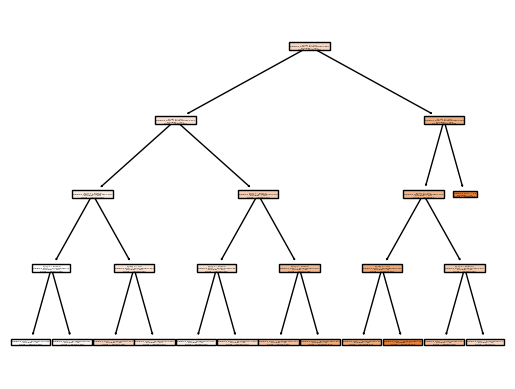

In [17]:
# depth of 4

#using the X_3 matrix again
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)

# Fit decision tree:
cart = tree.DecisionTreeRegressor(max_depth=4) # Create a regression object
cart = cart.fit(X_train, y_train)

# Visualize results:
tree.plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#find the R2 and RMSE
pn(cart.score(X_test, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

Accuracy:  0.5 

0.771551015627296 

148104.22206151357 



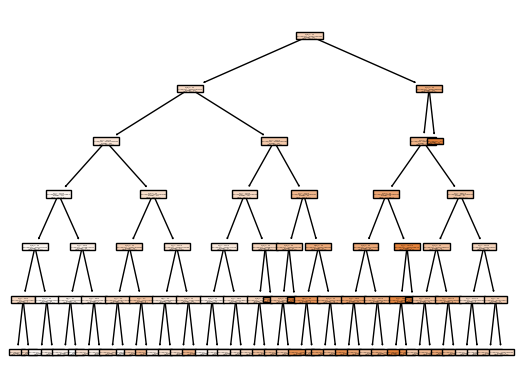

In [18]:
# depth of 6

#using the X_3 matrix again
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)

# Fit decision tree:
cart = tree.DecisionTreeRegressor(max_depth=6) # Create a regression object
cart = cart.fit(X_train, y_train)

# Visualize results:
tree.plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#find the R2 and RMSE
pn(cart.score(X_test, y_test)) # R squared measure

pn(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE


##As depth increases, the R squared gets closer to 1 --> improved fit

For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

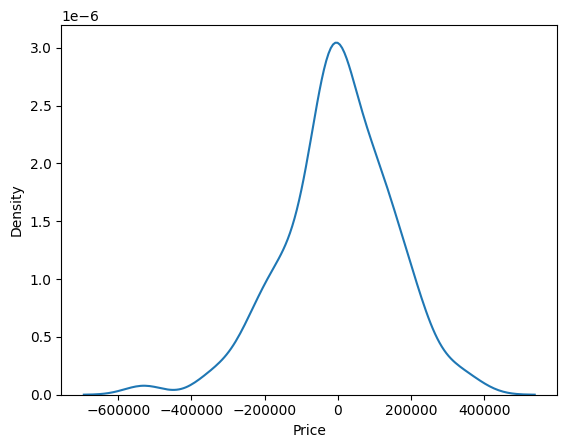

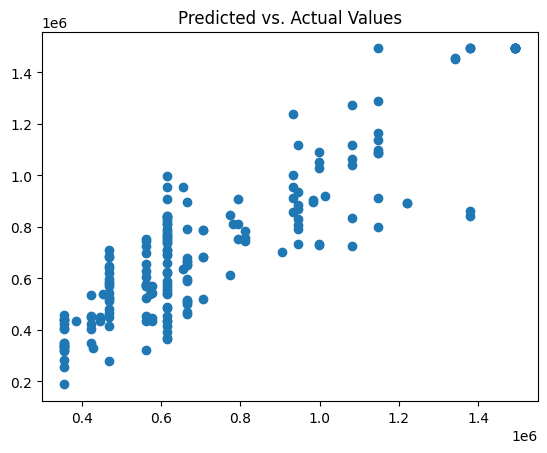

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=1)

# Predicted values:
y_hat_tree = cart.predict(X_test)

residuals_tree = y_test - y_hat_tree

## Residual plot:
sns.kdeplot(residuals_tree)
plt.show()
# The residuals are roughly bell shaped around zero.  The range for this kernel density plot is approximately -600,000 to 400,000.

## True versus predicted plot:
plt.scatter(x=y_hat_tree,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()
#The predicted values and true values vaguely line up along the diagonal.
#There is some deviation from the diagonal as the predicted values increase.

Which model --- linear model or classification and regression tree --- has better performance on the test set?

##ANSWER:
I think the linear model had better performance on the test set.  The R squared value for the best linear model was closer to 1 than the R squared value for the best regression tree.  The residuals value was also lower for the best linear model than the best regression tree.  

The predicted and true values for the linear model also seemed to line up in more of a diagonal than those for the regression tree, but that observation is not statistically backed.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

1: Load the contraceptiveMethodChoice.csv data. Tabulate the method variable (i.e. .value_counts()). #1 corresponds to No Contraception, 3 corresponds to Short Term (e.g. condoms, birth control pills), and 2 corresponds to Long Term (e.g. IUD, sterilization). Cross tabulate method and numberChildren. Do couples that use birth control tend to have more children than those who don't?

In [20]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# loading
df2=pd.read_csv('./assignment4/data/contraception_hw.csv')
df2.head(2)

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1


In [30]:
col_values = df2.iloc[:,0]
print(col_values)

0          1
1          2
2          3
3          4
4          5
        ... 
1468    1469
1469    1470
1470    1471
1471    1472
1472    1473
Name: Unnamed: 0, Length: 1473, dtype: int64


In [23]:
#tabulate method
df2['method'].value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [24]:
#cross tabulate methd and numberChildren
pd.crosstab(df2['method'], df2['numberChildren'])

# More couples who do NOT use birth control have 0 children than couples who do use birth control, which was different than I expected.
# In fact, 143 couples who do not use birth control only have 1 child, compared 87 short-term birth control
#couples and 46 long-term birth control couples.
#There are more no-birth control couples that have 0-1 children than both types of birth-control couples combined

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


Split the sample into ~80% training data and ~20% testing data.

In [25]:
#splitting on method

from sklearn.model_selection import train_test_split

y = df2['method']
X = df2.drop(['method'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

[Text(0.3333333333333333, 0.9, 'x[0] <= 415.5\nsquared_error = 0.763\nsamples = 1178\nvalue = 1.928'),
 Text(0.2222222222222222, 0.7, 'squared_error = 0.0\nsamples = 322\nvalue = 1.0'),
 Text(0.4444444444444444, 0.7, 'x[0] <= 1001.5\nsquared_error = 0.604\nsamples = 856\nvalue = 2.277'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 642.5\nsquared_error = 0.237\nsamples = 473\nvalue = 2.613'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.0\nsamples = 183\nvalue = 2.0'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.0\nsamples = 290\nvalue = 3.0'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 1214.5\nsquared_error = 0.746\nsamples = 383\nvalue = 1.862'),
 Text(0.5555555555555556, 0.3, 'squared_error = 0.0\nsamples = 173\nvalue = 1.0'),
 Text(0.7777777777777778, 0.3, 'x[0] <= 1320.5\nsquared_error = 0.245\nsamples = 210\nvalue = 2.571'),
 Text(0.6666666666666666, 0.1, 'squared_error = 0.0\nsamples = 90\nvalue = 2.0'),
 Text(0.8888888888888888, 0.1, 'squared_error = 0.0\nsamples = 120\nvalu

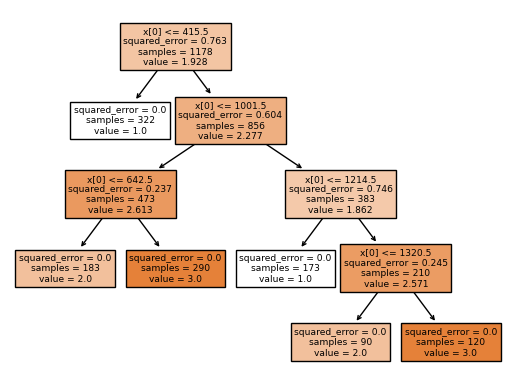

In [26]:
from sklearn import tree
regress = tree.DecisionTreeRegressor()

regress = regress.fit(X_train, y_train)

tree.plot_tree(regress,filled=True)

##ANSWER:
The terminal nodes in the tree take numeric values (likely floats, because they have decimal points).  They are 1.0, 2.0, 3.0 .  This does not make sense, considering the fact that the goal of the tree was to predict contraception method which is represented by 1, 2, and 3 CATEGORIES, not numeric values.  The problem here is that the numbers '1,2, and 3' were treated as numeric, and not categorical.  These numbers are not supposed to be 'real' numbers- they should represent the categories of no birth control use, short-term birth control use, and long-term birth control use.

Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

[Text(0.25, 0.9166666666666666, 'x[0] <= 415.5\ngini = 0.649\nsamples = 1178\nvalue = [495, 273, 410]'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 322\nvalue = [322, 0, 0]'),
 Text(0.375, 0.75, 'x[0] <= 642.5\ngini = 0.628\nsamples = 856\nvalue = [173, 273, 410]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 183\nvalue = [0, 183, 0]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= 1001.5\ngini = 0.545\nsamples = 673\nvalue = [173, 90, 410]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 290\nvalue = [0, 0, 290]'),
 Text(0.625, 0.4166666666666667, 'x[0] <= 1214.5\ngini = 0.643\nsamples = 383\nvalue = [173, 90, 120]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 173\nvalue = [173, 0, 0]'),
 Text(0.75, 0.25, 'x[0] <= 1320.5\ngini = 0.49\nsamples = 210\nvalue = [0, 90, 120]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 90\nvalue = [0, 90, 0]'),
 Text(0.875, 0.08333333333333333, 'gini = 0.0\nsamples = 120\nvalue = [0, 0, 120]')]

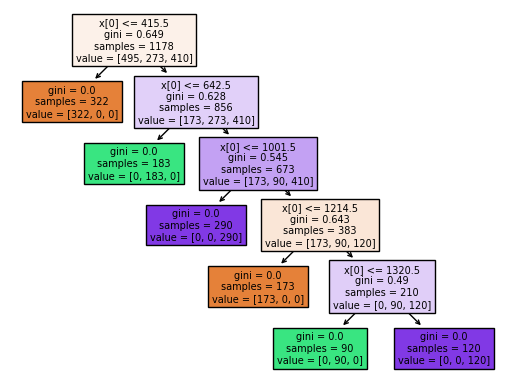

In [32]:
classify = tree.DecisionTreeClassifier()

classify = classify.fit(X_train, y_train)

tree.plot_tree(classify,filled=True)

##ANSWER:
The terminal nodes in this tree look different, because they show the number of couples that use a given method of birth control.  The values are represented as row vectors: [1 (no bc), 2 (long term bc), 3 (short term bc)].  The algorithm uses categorical variables instead of numeric.



--> In broad terms, which groups of people are most likely to use each method of contraception?

Based on the way the tree split the data, it is difficult to determine other information about the different birth-control couples.  The tree seems to be splitting based on couple ID number, which does not provide any additional info about who the couples are.

5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [28]:
##accuracy of model overall

## Make Predictions on the Test Set
y_hat = classify.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy for Model Overall: ', acc, '\n')
pd.crosstab(y_test,y_hat)

##accuracy for each method individually:
#Method 1: 1.0
#Method 2: 1.0
#Method 3: 0.99

Accuracy for Model Overall:  1.0 



col_0,1,2,3
method,,,
1,133,0,1
2,0,60,0
3,0,0,101


Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [29]:
#something along the line of a linear model wouldnt be able to pull couples out as it went along- idk man

# a linear model would not have been able to consider all the different factors/variables that contribute to a couple's chosen method of bc
# the regression tree allows couples to be 'pulled out' and grouped into bc categories as the model works through different variables
# it is a removal/grouping process, not a conclusion that is made all at once like it would be if a linear model was used


# background on numeric dependent variable: https://bookdown.org/pingapang9/linear_models_bookdown/chap-categorical.html
# additionally, the dependent variable for this exercise is categorical, not numeric (as discussed earlier- 1 is a category, not an integer or float)
# this calls for a regression tree, rather than a linear probability model


**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?